In [1]:
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



In [2]:
# Step 2: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

In [3]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Create SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [4]:
# Step 6: Create SVM with Polynomial Kernel (degree=3)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)




SVC(kernel='poly', random_state=42)

In [5]:
# Step 7: Create SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [6]:
# Step 8: Predict on test data and print Accuracy
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print Accuracy
print(f'Accuracy (Linear Kernel): {accuracy_score(y_test, y_pred_linear)}')
print(f'Accuracy (Polynomial Kernel): {accuracy_score(y_test, y_pred_poly)}')
print(f'Accuracy (RBF Kernel): {accuracy_score(y_test, y_pred_rbf)}')


Accuracy (Linear Kernel): 0.9666666666666667
Accuracy (Polynomial Kernel): 0.9666666666666667
Accuracy (RBF Kernel): 1.0



Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix (Linear Kernel):


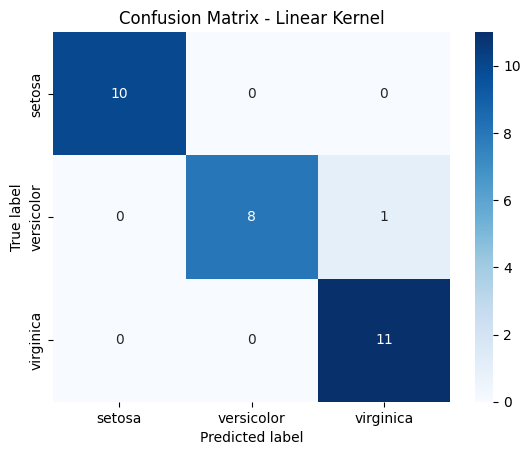

In [7]:
# Step 9: Classification Report and Confusion Matrix for Linear Kernel
print("\nClassification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

print("\nConfusion Matrix (Linear Kernel):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Linear Kernel")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix (Polynomial Kernel):


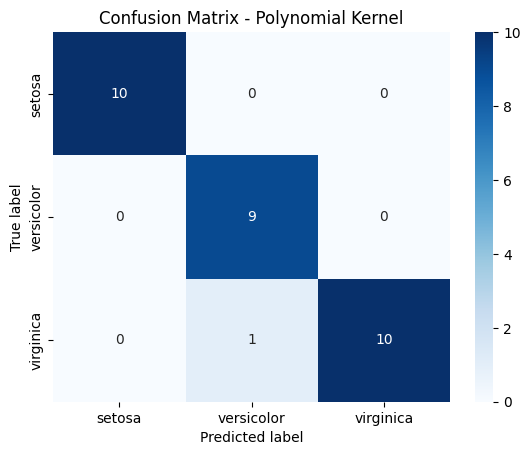

In [8]:
# Step 9 (continued): Polynomial Kernel - Classification Report and Confusion Matrix
print("\nClassification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

print("\nConfusion Matrix (Polynomial Kernel):")
cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Polynomial Kernel")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix (RBF Kernel):


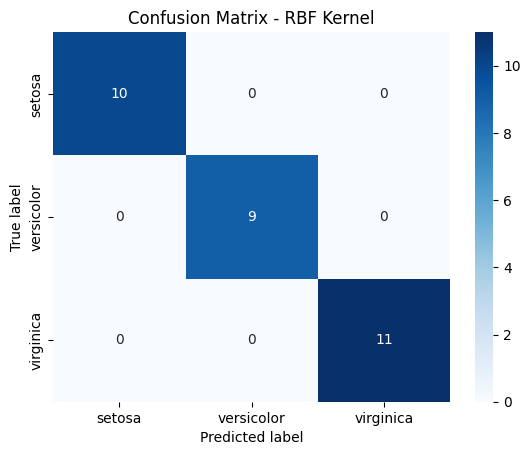

In [9]:
# Step 9 (continued): RBF Kernel - Classification Report and Confusion Matrix
print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

print("\nConfusion Matrix (RBF Kernel):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - RBF Kernel")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [10]:
# Step 10: Visualizing Decision Boundaries using PCA for Dimensionality Reduction

# Reduce to two features for visualization
X_reduced = PCA(n_components=2).fit_transform(X)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    return scatter


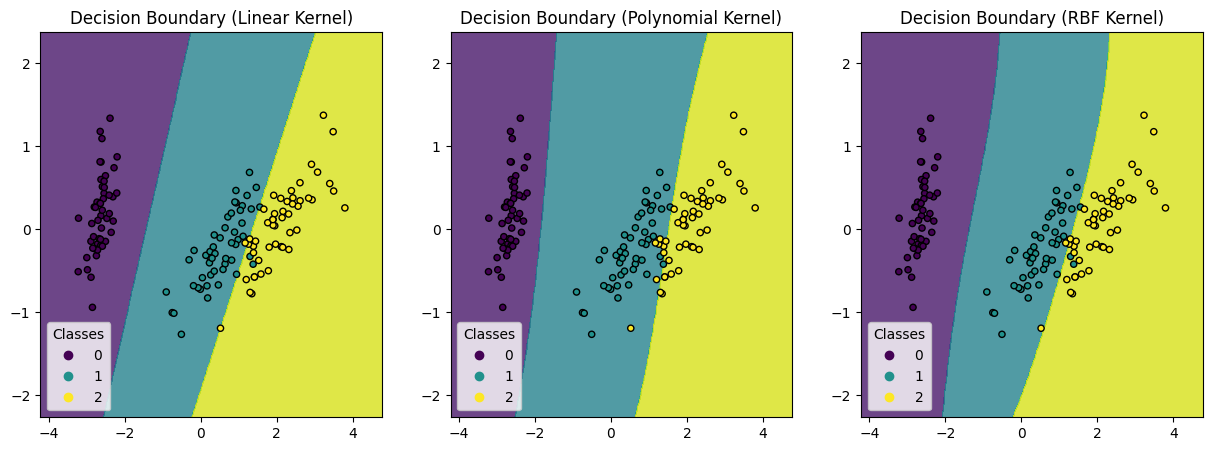

In [11]:
# Initialize the SVM models using the 2D reduced data
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

# Train the models using X_reduced
svm_linear.fit(X_reduced, y)
svm_poly.fit(X_reduced, y)
svm_rbf.fit(X_reduced, y)

# Plot decision boundaries for each kernel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, model, title in zip(axes, [svm_linear, svm_poly, svm_rbf], ['Linear', 'Polynomial', 'RBF']):
    scatter = plot_decision_boundary(model, X_reduced, y, ax)
    ax.set_title(f'Decision Boundary ({title} Kernel)')
    ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [12]:
# GridSearch for Polynomial Kernel
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_search_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)
print(f"Best parameters for Polynomial Kernel: {grid_search_poly.best_params_}")

# GridSearch for RBF Kernel
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train, y_train)
print(f"Best parameters for RBF Kernel: {grid_search_rbf.best_params_}")


Best parameters for Polynomial Kernel: {'C': 10, 'degree': 3}
Best parameters for RBF Kernel: {'C': 1, 'gamma': 'scale'}
